## 1. Explain the importance of weight initialization in artificial neural networks. WhE is it necessarE to initialize the weights carefullED

# 2. Describe the challenges associated with improper weight initialization. How do these issues affect model training and convergence?

# 3. Discuss the concept of variance and how it relates to weight initialization. WhE is it crucial to consider the variance of weights during initializationC

# 4. Explain the concept of zero initialization. Discuss its potential limitations and when it can be appropriate to use?

# 5. Describe the process of random initialization. How can random initialization be adjusted to mitigate potential issues like saturation or vanishing/exploding gradientsD

# 6. Discuss the concept of Xavier/Glorot initialization. Explain how it addresses the challenges of improper weight initialization and the underlEing theorE behind itk 

# 7. Explain the concept of He initialization. How does it differ from Xavier initialization, and when is it preferred?

# 8. Implement different weight initialization techniques (zero initialization, random initialization, Xavier initialization, and He initialization) in a neural network using a framework of Eour choice. Train the model on a suitable dataset and compare the performance of the initialized modelsk

In [58]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [60]:
def create_model(initializer):
    model = models.Sequential([
        layers.InputLayer(input_shape=(28*28,)),
        layers.Dense(256, activation='relu', kernel_initializer=initializer),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [75]:
def train_and_evaluate(initializer, initializer_name):
    model = create_model(initializer)
    history = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2, verbose=0)
    
    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    
    print(f"{initializer_name} Initialization - Test Accuracy: {test_accuracy:.4f}")
    return history.history['loss'], test_accuracy


In [70]:
# Zero Initialization
initializer_zero = initializers.Zeros()

# Random Normal Initialization
initializer_random = initializers.RandomNormal(mean=0.0, stddev=0.01)

# Xavier (Glorot) Initialization
initializer_xavier = initializers.GlorotNormal()

# He Initialization
initializer_he = initializers.HeNormal()


In [77]:
results = {}

# Zero Initialization
print("Training with Zero Initialization")
loss_zero, accuracy_zero = train_and_evaluate(initializer_zero, "Zero")
results['Zero'] = (loss_zero, accuracy_zero)

# Random Initialization
print("\nTraining with Random Initialization")
loss_random, accuracy_random = train_and_evaluate(initializer_random, "Random")
results['Random'] = (loss_random, accuracy_random)

# Xavier Initialization
print("\nTraining with Xavier Initialization")
loss_xavier, accuracy_xavier = train_and_evaluate(initializer_xavier, "Xavier")
results['Xavier'] = (loss_xavier, accuracy_xavier)

# He Initialization
print("\nTraining with He Initialization")
loss_he, accuracy_he = train_and_evaluate(initializer_he, "He")
results['He'] = (loss_he, accuracy_he)


Training with Zero Initialization
Zero Initialization - Test Accuracy: 0.1135

Training with Random Initialization
Random Initialization - Test Accuracy: 0.9031

Training with Xavier Initialization
Xavier Initialization - Test Accuracy: 0.9018

Training with He Initialization
He Initialization - Test Accuracy: 0.9059


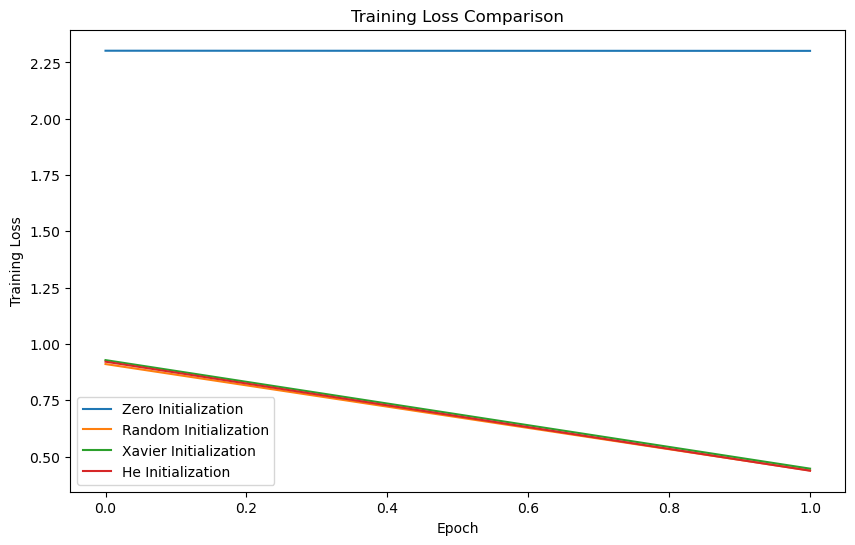

Zero Initialization Test Accuracy: 0.11%
Random Initialization Test Accuracy: 0.90%
Xavier Initialization Test Accuracy: 0.90%
He Initialization Test Accuracy: 0.91%


In [79]:
# Plotting training losses
plt.figure(figsize=(10, 6))
for key in results:
    plt.plot(results[key][0], label=f'{key} Initialization')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()

# Print test accuracies
for key in results:
    print(f'{key} Initialization Test Accuracy: {results[key][1]:.2f}%')


# 9. Discuss the considerations and tradeoffs when choosing the appropriate weight initialization technique for a given neural network architecture and task.

In [ ]:
Choosing the appropriate weight initialization technique for a neural network is crucial for achieving efficient training and good model performance. The decision involves several considerations and tradeoffs, which are influenced by the architecture of the network, the activation functions used

1.For ReLU and its variants like Leaky ReLU and Parametric ReLU, He initialization is often preferred. This is because He initialization helps maintain a stable variance of activations and gradients, preventing vanishing gradients that can occur due to the zeroing of negative inputs in ReLU.
Xavier initialization is generally more suitable for sigmoid and tanh activation functions, as it helps maintain a balanced variance across layers, which is important for these functions to avoid saturation.

2.As networks become deeper, the choice of initialization becomes critical to prevent vanishing or exploding gradients. Techniques like Xavier or He initialization are designed to address these issues by maintaining stable variance throughout the network.
3. These methods often lead to faster convergence by ensuring that the activations and gradients maintain their scale, thus optimizing the learning dynamics.
4.batch normalization can mitigate issues with initialization by normalizing the inputs to each layer, allowing for a wider range of initializations to be effective.